In [1]:
from flask import Flask
from flask import Flask, flash, request, redirect, url_for
from flask import send_file

from flask import json
from json import JSONEncoder

import numpy as np
import os
from werkzeug.utils import secure_filename
from flask import render_template
from flask import Flask, make_response, request
from flask import jsonify

In [2]:
import import_ipynb

from service import analyze as ServiceAnalyze
from service import trainModels
from service import Statistics

importing Jupyter notebook from service.ipynb
importing Jupyter notebook from service.ipynb


In [3]:

# statistics =  Statistics()
# #counts of y classes
# statistics.initResultCounts = data.groupby(resultColumnName).size()
# # statistics.describeTable = data.describe()
# # statistics.mostImportatnt = mostImportantFeatures

# statistics.scores = [1,3]

# class StatisticsEncoder(json.JSONEncoder):
#     def default(self, obj):
#         if isinstance(obj, np.ndarray):
#             if obj.flags['C_CONTIGUOUS']:
#                 obj_data = obj.data
#             else:
#                 cont_obj = np.ascontiguousarray(obj)
#                 assert(cont_obj.flags['C_CONTIGUOUS'])
#                 obj_data = cont_obj.data
#             ## data_b64 = base64.b64encode(obj_data)
#             ## converting to base64 and returning a dictionary did not work
#             ## return dict(__ndarray__ = data_b64, dtype = str(obj.dtype), shape = obj.shape)
#             return obj.tolist()  ## instead, utilize numpy builtin tolist() method
#         try:
#             my_dict = obj.__dict__   ## <-- ERROR raised here
#         except TypeError:
#             pass
#         else:
#             return my_dict
#         return json.JSONEncoder.default(self, obj)




In [4]:
UPLOAD_FOLDER = os.getcwd() + '\\files\\upload'
ALLOWED_EXTENSIONS = {'zip', 'csv'}

app = Flask(__name__,static_url_path='/files')

@app.route("/")
@app.route("/train", methods=['GET'])
def train():
    return render_template("train.html")

@app.route("/analyze", methods=['GET'])
def analyze():
    return render_template("analyze.html")

In [5]:
def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/train', methods=['POST'])
def upload_train_file():
    # check if the post request has the file part
    if 'file' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file = request.files['file']
    # if user does not select file, browser also
    # submit an empty part without filename
    if file.filename == '':
        flash('No selected file')
        return redirect(request.url)
    if file and allowed_file(file.filename):
        filename = file.filename
        file_name = secure_filename(filename)
        file.save(UPLOAD_FOLDER+ '\\' + file_name)
        
        trainedFile = trainModels(UPLOAD_FOLDER+ '\\' + file_name)
        
        os.remove(UPLOAD_FOLDER+ '\\' + file_name)
        return send_file(trainedFile, as_attachment=True)
    

@app.route('/analyze', methods=['POST'])
def upload_analyze_file():
    if 'file_trained' not in request.files or 'file_data' not in request.files:
        flash('No file part')
        return redirect(request.url)
    file_trained = request.files['file_trained']
    file_data = request.files['file_data']
    if file_trained.filename == '':
        flash('No selected file')
    if file_data.filename == '':
        flash('No selected file')
        return redirect(request.url)
    
    if file_trained and allowed_file(file_trained.filename) and file_data and allowed_file(file_data.filename):
        file_trained_name = file_trained.filename
        file_trained_name = secure_filename(file_trained_name)
        file_data_name = file_data.filename
        file_data_name = secure_filename(file_data_name)
        
        file_trained.save(UPLOAD_FOLDER+ '\\' + file_trained_name)
        file_data.save(UPLOAD_FOLDER+ '\\' + file_data_name)
        
        stats = ServiceAnalyze(UPLOAD_FOLDER+ '\\' + file_data_name, UPLOAD_FOLDER+ '\\' + file_trained_name)
        
        
        initResultCounts = {}
        for items in stats.initResultCounts.iteritems(): 
            initResultCounts[items[0]] = items[1]

        scores = {}
        for items in stats.scores: 
            scores[items.name] = items.score
        mostImportant = []
        for items in stats.mostImportatnt: 
            mostImportant.append(items)
        jsonResponse = {
            'reportId': stats.reportId,
            'initResultCounts': initResultCounts,
            'scores': scores,
            'modelName': stats.modelNames,
            'mostImportatnt': mostImportant,
        }
                
        os.remove(UPLOAD_FOLDER+ '\\' + file_trained_name)
        os.remove(UPLOAD_FOLDER+ '\\' + file_data_name)

    #                   describeTable = stats.describeTable, 

        return jsonify(jsonResponse)
        
        

In [6]:
@app.route('/train', methods=['GET'])
def download_report(ticks):
    return send_file(os.getcwd() + '\\static\\reports\\' + ticks, as_attachment=True)
    

 * Serving Flask app "__main__" (lazy loading)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Jun/2020 17:39:14] "GET /analyze HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2020 17:39:14] "GET /analyze HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2020 17:39:15] "GET /files/css/index.css HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2020 17:39:15] "GET /files/css/index.css HTTP/1.1" 200 -
service.ipynb:57: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  "source": [
service.ipynb:58: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  "data = []\n",
service.ipynb:60: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  "models = []\n",
service.ipynb:61: MatplotlibDeprecationWarning: 
The tick2On function was deprecated 

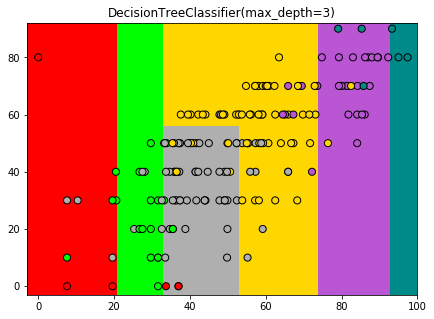

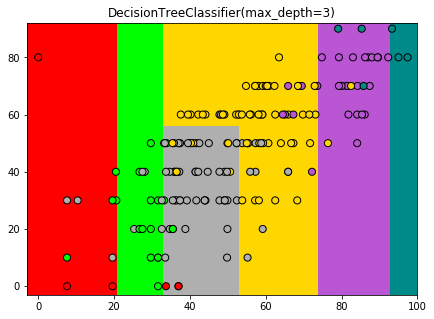

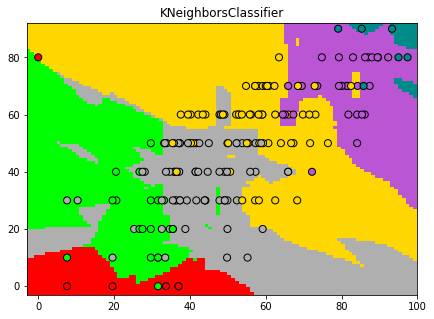

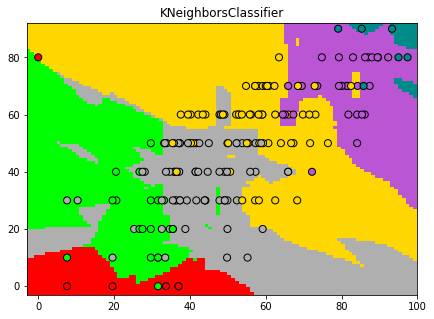

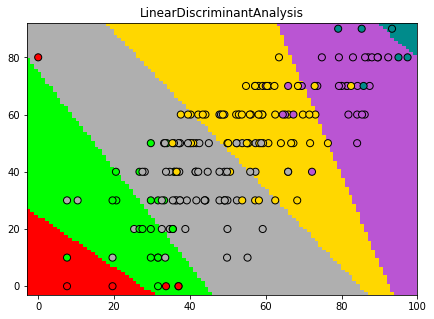

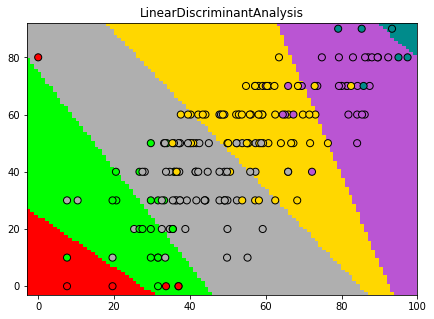

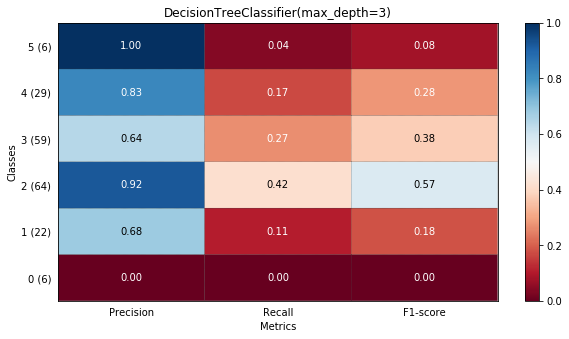

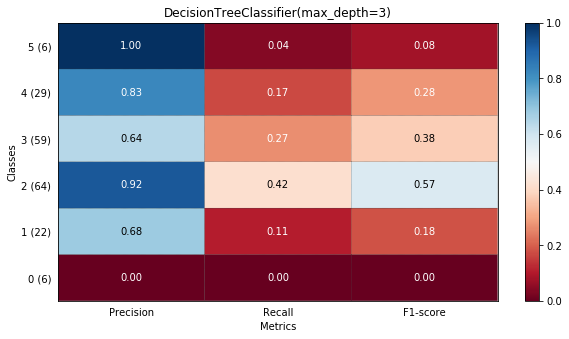

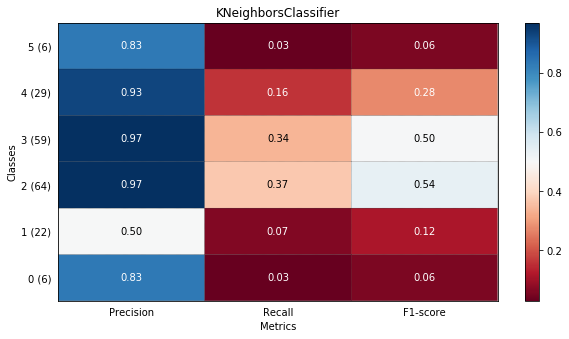

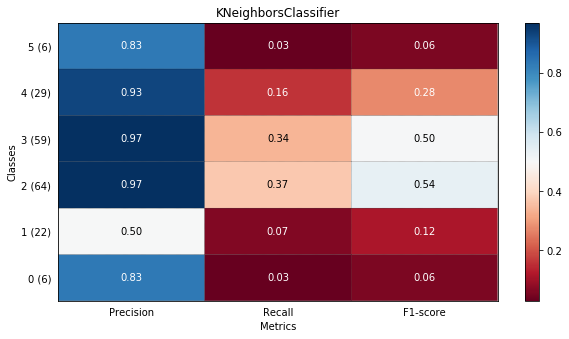

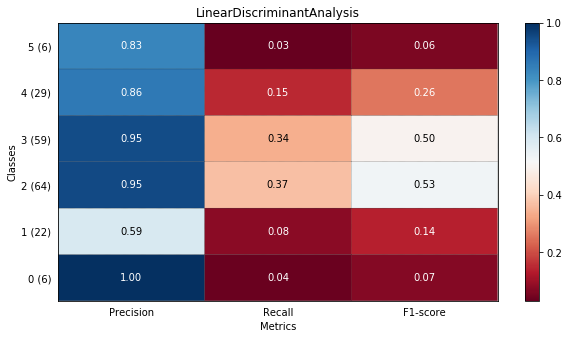

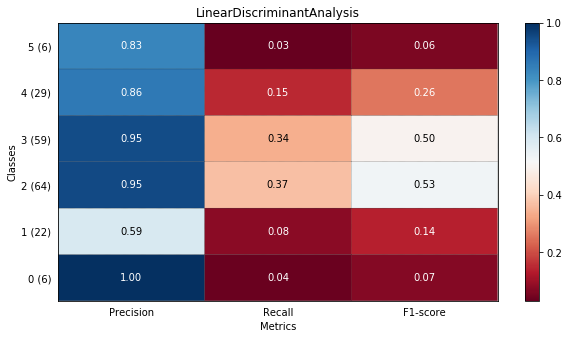

In [7]:

if __name__ == "__main__":
    app.run()